# Student grades prediction

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv('/Users/sneha/Downloads/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [10]:
df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [ ]:
## Clearly all columns are object type except the target column : CGPA. 

In [8]:
df[df.duplicated()]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


In [6]:
df.isnull().any()

Seat No.     False
PH-121       False
HS-101       False
CY-105        True
HS-105/12     True
MT-111        True
CS-105       False
CS-106        True
EL-102        True
EE-119        True
ME-107        True
CS-107        True
HS-205/20     True
MT-222        True
EE-222        True
MT-224        True
CS-210        True
CS-211        True
CS-203        True
CS-214        True
EE-217        True
CS-212        True
CS-215        True
MT-331        True
EF-303        True
HS-304        True
CS-301        True
CS-302        True
TC-383        True
MT-442        True
EL-332        True
CS-318        True
CS-306        True
CS-312        True
CS-317        True
CS-403        True
CS-421        True
CS-406        True
CS-414        True
CS-419        True
CS-423        True
CS-412        True
CGPA         False
dtype: bool

In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

fill null values by first considering the mode of the subject's column and then applying collaborative filtering to find students with similar modes of grades.

The cosine_similarity calculation is based on whether a grade is available (1) or not (0). 

In [11]:
from scipy.stats import mode
from sklearn.metrics.pairwise import cosine_similarity
# Define a function to calculate the mode of a list, handling cases with multiple modes
def calculate_mode(values):
    mode_result = mode(values)
    return mode_result.mode[0] if len(mode_result.mode) > 0 else None

# Calculate the mode for each subject's column
column_modes = {}
for col in df.columns:
    column_modes[col] = df[col].mode()[0]

# Calculate cosine similarity matrix between rows (students)
grade_columns = [col for col in df.columns if '-' in col]
cosine_sim = cosine_similarity(df[grade_columns].applymap(lambda x: 0 if pd.isnull(x) else 1))  # 1 if grade available, 0 otherwise

# Iterate through each row to fill null values
for index, row in df.iterrows():
    for col in df.columns:
        if pd.isnull(row[col]):
            subject_mode = column_modes[col]
            similar_students = cosine_sim[index]
            similar_students_indices = similar_students.argsort()[::-1][1:]  # Exclude the student itself
            
            for student_idx in similar_students_indices:
                grade_value = df.at[student_idx, col]
                if pd.notnull(grade_value):
                    df.at[index, col] = grade_value
                    break
            else:
                df.at[index, col] = subject_mode  # If no similar student has a value, use column mode

# Now your DataFrame 'data' has been filled using the collaborative filtering approach without converting grades to numeric


In [14]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [16]:
# Select columns corresponding to course grades
subject_columns = [col for col in df.columns if '-' in col]

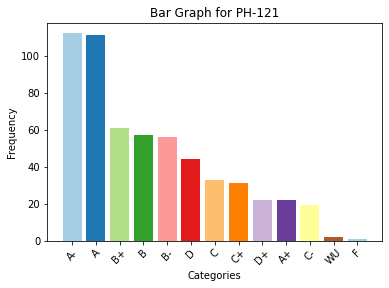

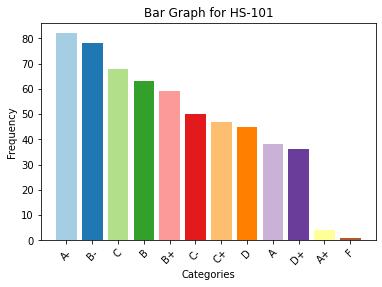

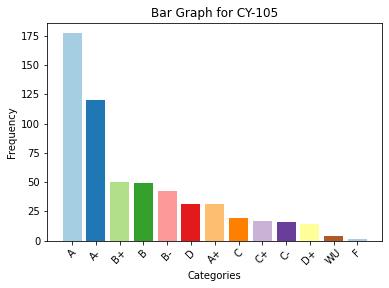

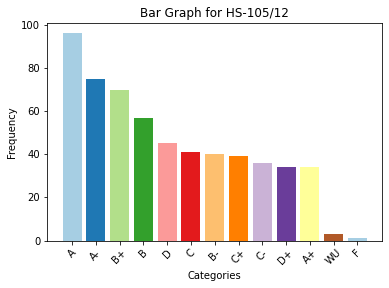

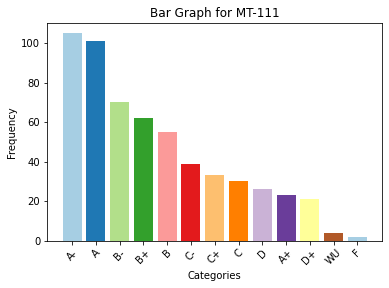

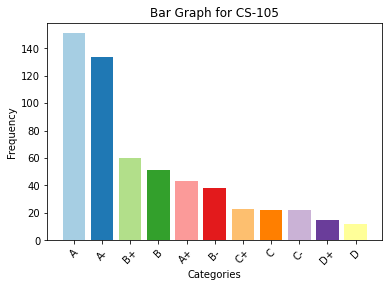

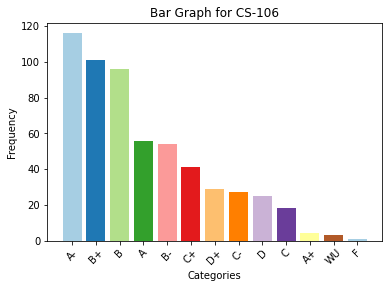

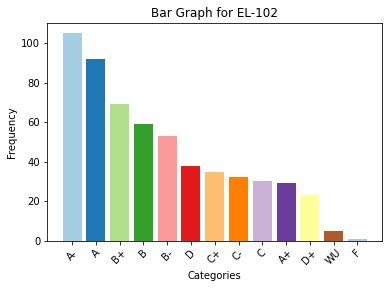

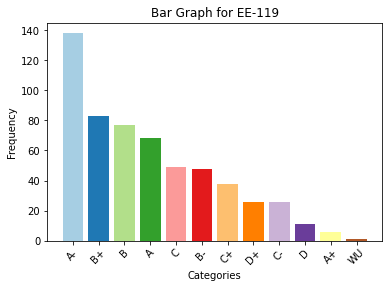

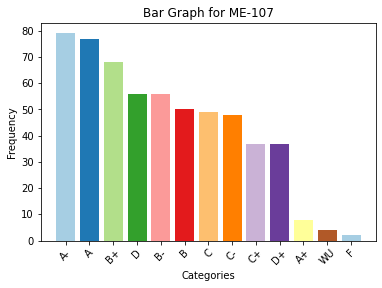

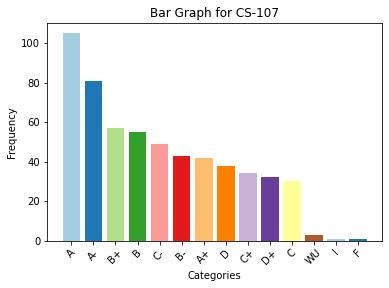

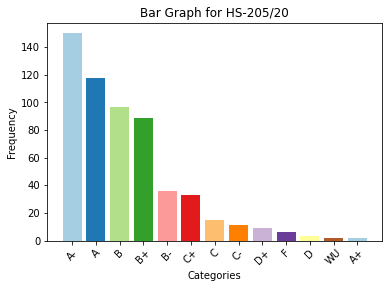

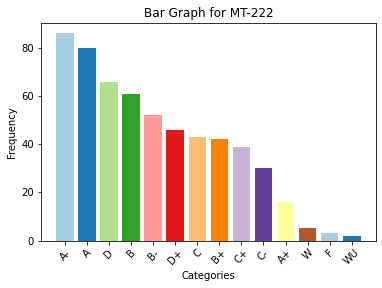

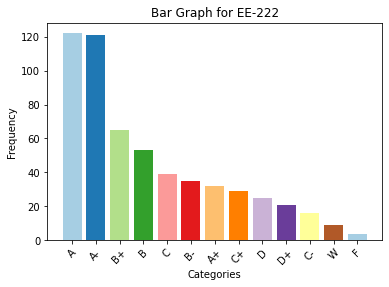

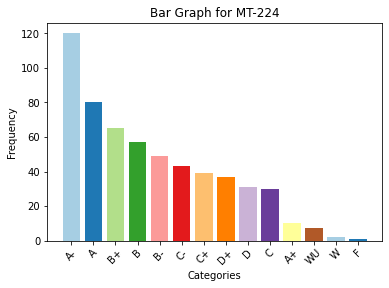

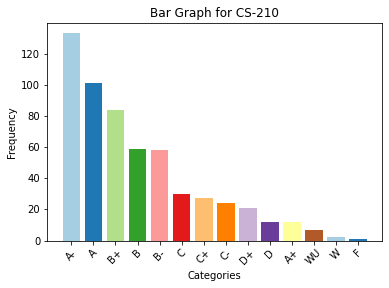

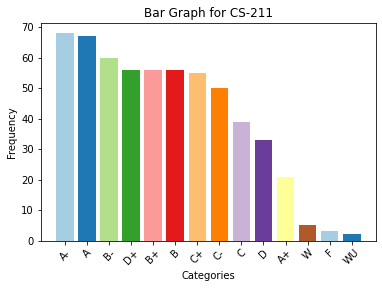

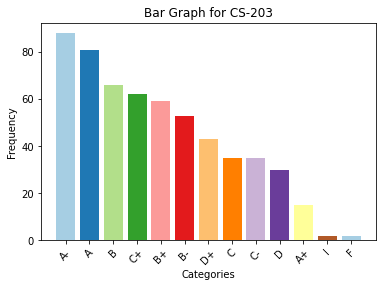

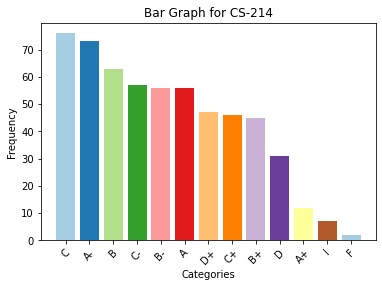

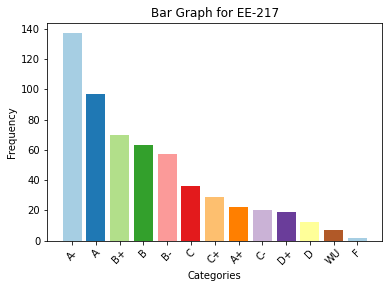

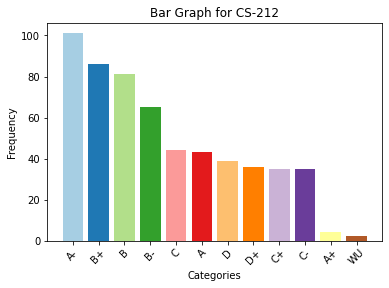

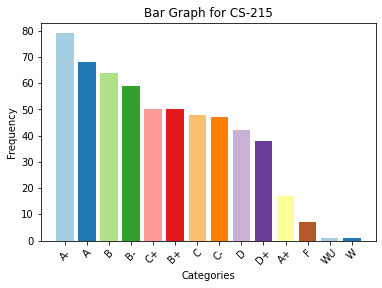

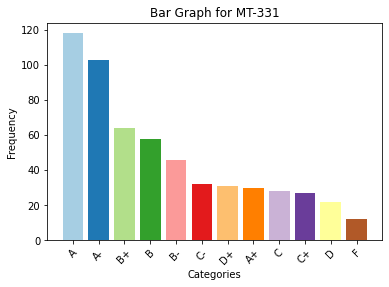

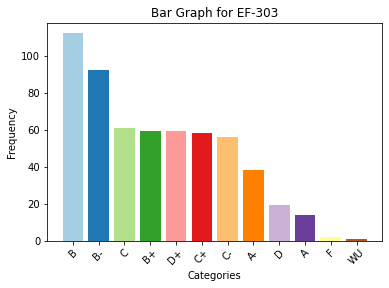

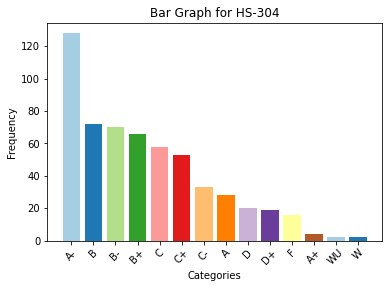

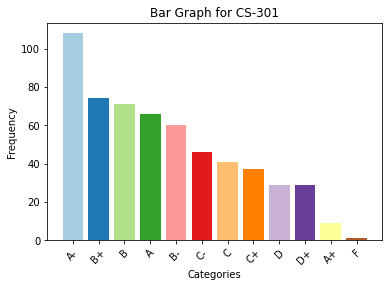

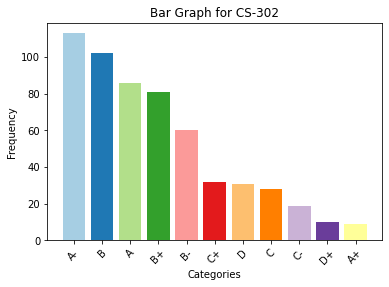

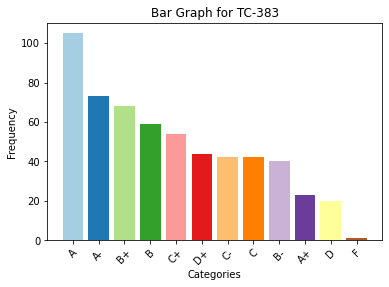

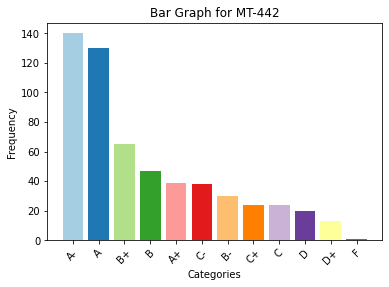

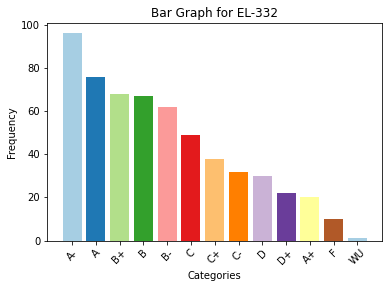

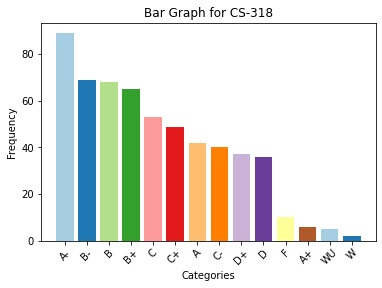

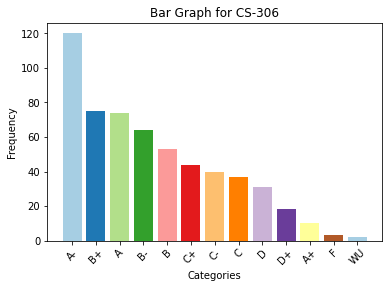

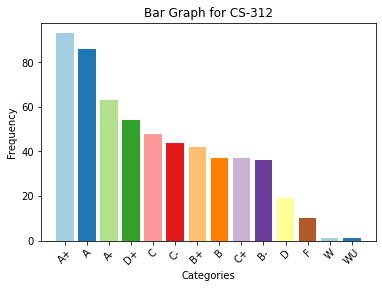

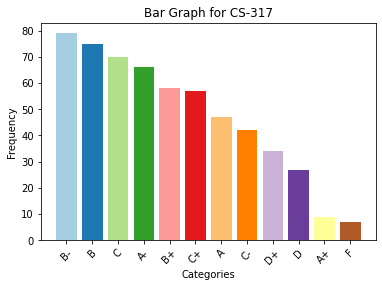

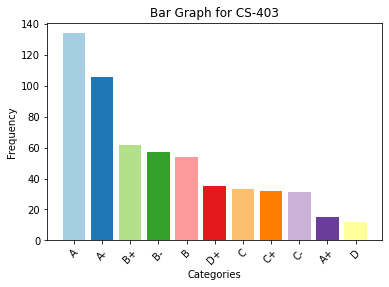

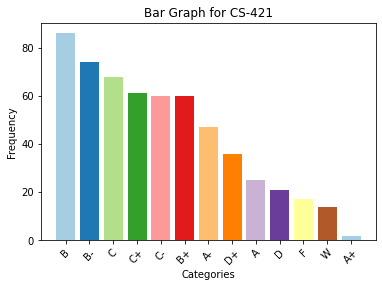

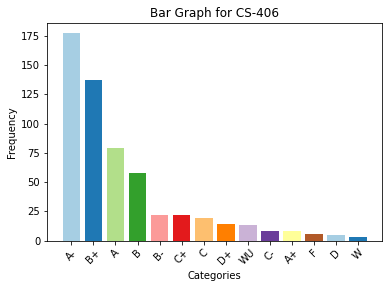

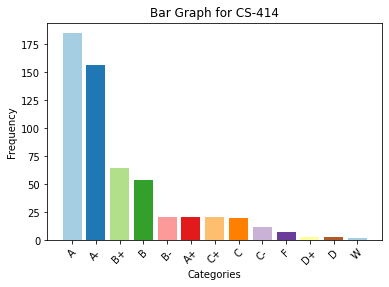

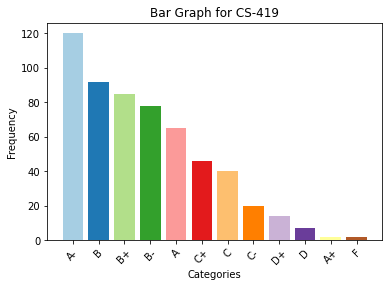

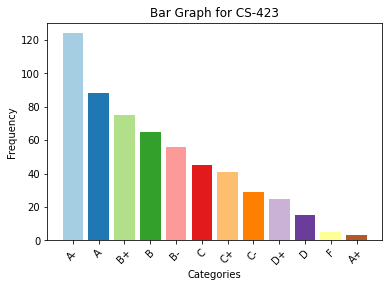

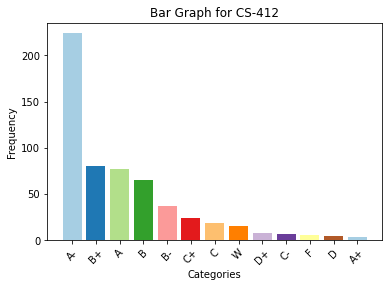

In [20]:
for col in subject_columns:
    # Calculate the frequency of each category in the column
    value_counts = df[col].value_counts()
    
    # Create a bar graph for the current column
    plt.bar(value_counts.index, value_counts.values, color=plt.cm.Paired.colors)
    
    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(f'Bar Graph for {col}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

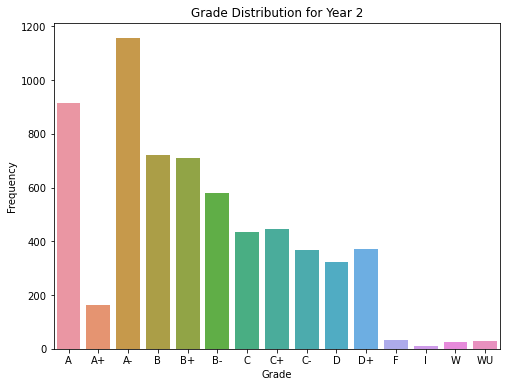

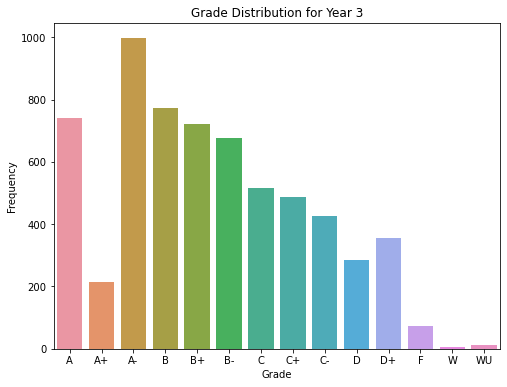

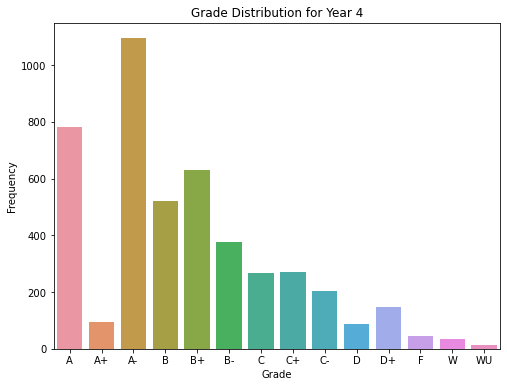

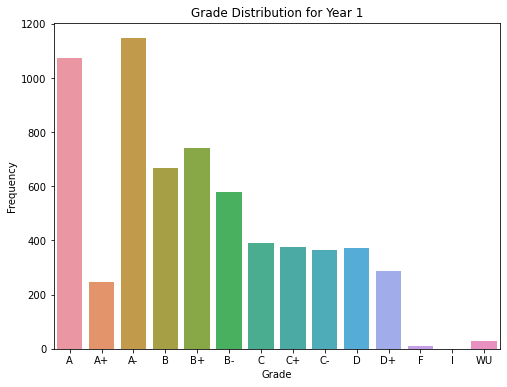

In [31]:
# Analyze Grade Distributions for Each Year

years = set([col.split('-')[1][:1] for col in grade_columns])
for year in years:
    year_columns = [col for col in grade_columns if col.split('-')[1][:1] == year]
    
    year_grades = df[year_columns].stack().value_counts().sort_index()
    
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=year_grades.index, y=year_grades.values)
    plt.title(f'Grade Distribution for Year {year}')
    plt.xlabel('Grade')
    plt.ylabel('Frequency')
    plt.show()


In [143]:
# Count the Number of A Grades
df['A_Grades'] = df.apply(lambda row: row[row == 'A'].count(), axis=1)


/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A_Grades', ylabel='count'>

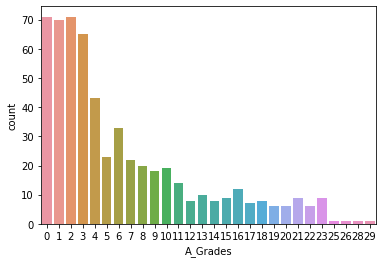

In [146]:
sns.countplot(df['A_Grades'])

Creating new columns that represent the counts of unique values (grades) is a creative way to capture the distribution of grades for each student. This approach can provide valuable information about a student's performance throughout their university tenure.

In [35]:
sub = df.drop(columns=["Seat No.","CGPA"])
sub

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B+,D,B,B,C-,D,C,B,B-,C


In [36]:
# Iterate through each row
for index, row in sub.iterrows():
    value_counts = row.value_counts()  # Count occurrences of unique values in the row
    for value, count in value_counts.items():
        new_column_name = f'{value}_count'
        sub.loc[index, new_column_name] = count

# Display the modified DataFrame
sub

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,A-_count,C+_count,B+_count,A_count,B_count,A+_count,WU_count,W_count,F_count,I_count
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,3.0,3.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
1,A,D,D+,D,B-,C,D,A,D+,D,...,3.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,9.0,1.0,4.0,18.0,4.0,1.0,NaN,NaN,NaN,NaN
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,1.0,6.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,19.0,2.0,4.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,8.0,NaN,4.0,18.0,4.0,7.0,NaN,NaN,NaN,NaN
567,A+,A,A,A,A,A,A,A-,A,A,...,6.0,1.0,3.0,21.0,3.0,6.0,NaN,NaN,NaN,NaN
568,B,A,A-,B+,A,A,A,A,A,B,...,5.0,1.0,10.0,12.0,9.0,1.0,NaN,NaN,NaN,NaN
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,NaN,3.0,2.0,2.0,5.0,1.0,NaN,NaN,NaN,NaN


In [38]:
sub.columns

Index(['C-_count', 'C_count', 'D+_count', 'D_count', 'B-_count', 'A-_count',
       'C+_count', 'B+_count', 'A_count', 'B_count', 'A+_count', 'WU_count',
       'W_count', 'F_count', 'I_count'],
      dtype='object')

In [37]:
columns_to_drop = sub.columns[sub.columns.get_loc('PH-121'):sub.columns.get_loc('CS-412') + 1]
sub.drop(columns=columns_to_drop, inplace=True)
sub

,C-_count,C_count,D+_count,D_count,B-_count,A-_count,C+_count,B+_count,A_count,B_count,A+_count,WU_count,W_count,F_count,I_count
0,13.0,5.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
1,4.0,7.0,7.0,11.0,4.0,3.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,3.0,9.0,1.0,4.0,18.0,4.0,1.0,NaN,NaN,NaN,NaN
3,4.0,2.0,9.0,11.0,4.0,1.0,6.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,NaN,5.0,19.0,2.0,4.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,NaN,NaN,NaN,NaN,NaN,8.0,NaN,4.0,18.0,4.0,7.0,NaN,NaN,NaN,NaN
567,NaN,1.0,NaN,NaN,NaN,6.0,1.0,3.0,21.0,3.0,6.0,NaN,NaN,NaN,NaN
568,NaN,1.0,NaN,NaN,2.0,5.0,1.0,10.0,12.0,9.0,1.0,NaN,NaN,NaN,NaN
569,5.0,5.0,3.0,8.0,7.0,NaN,3.0,2.0,2.0,5.0,1.0,NaN,NaN,NaN,NaN


In [39]:
sub.fillna(0, inplace=True)

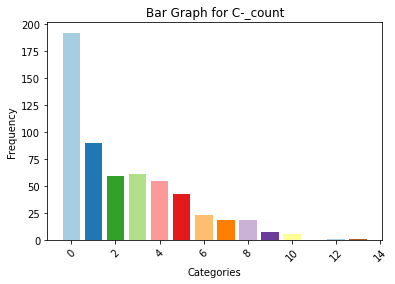

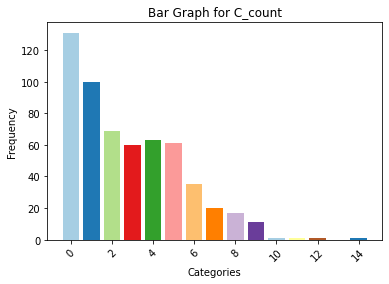

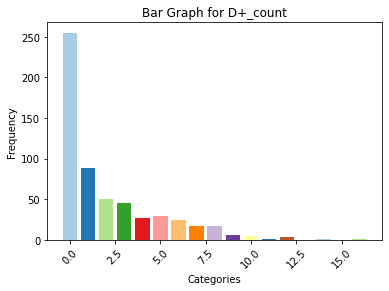

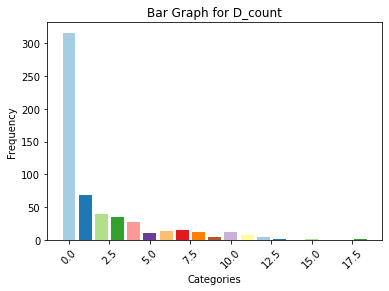

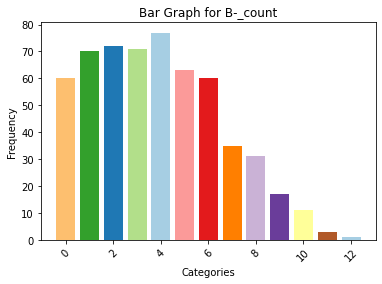

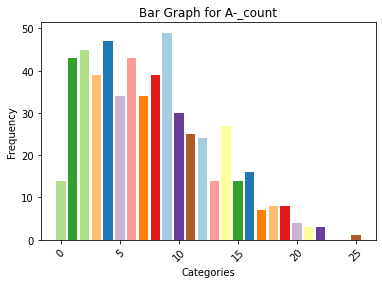

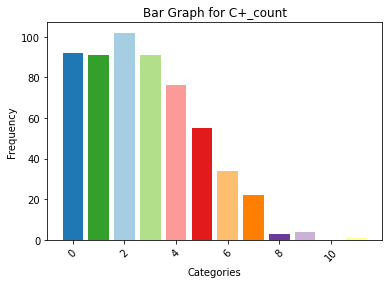

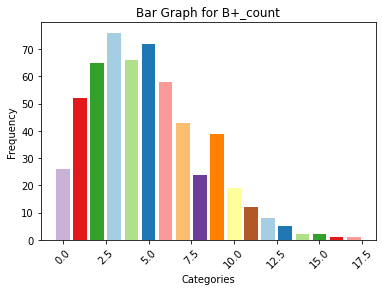

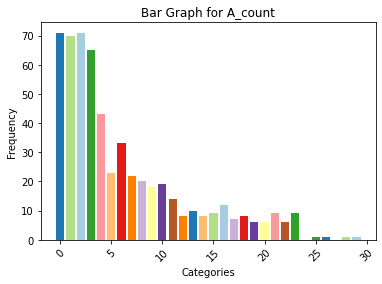

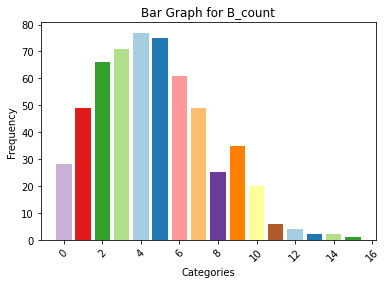

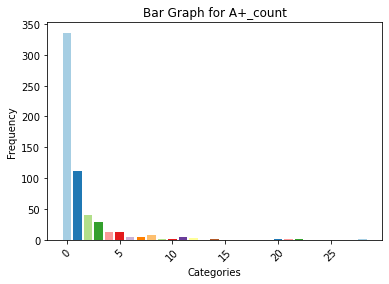

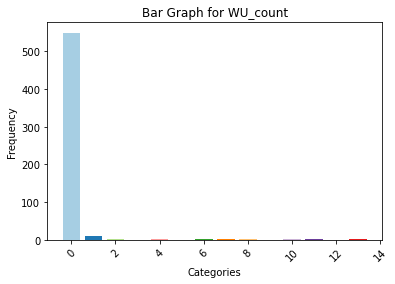

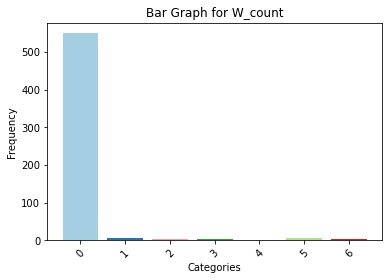

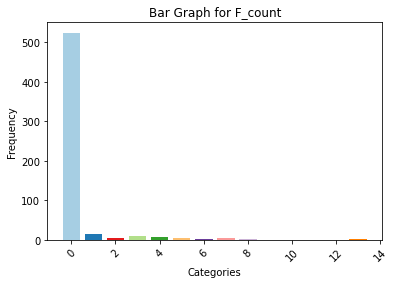

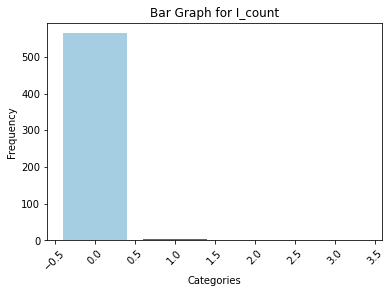

In [41]:
for col in sub.columns:
    # Calculate the frequency of each category in the column
    value_counts = sub[col].value_counts()
    
    # Create a bar graph for the current column
    plt.bar(value_counts.index, value_counts.values, color=plt.cm.Paired.colors)
    
    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(f'Bar Graph for {col}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

Removing outliers helps prevent them from disproportionately influencing the model's behavior. This step contributes to a more stable and reliable model.

In [ ]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)

# Fit the model and predict outliers
outliers = isolation_forest.fit_predict(sub)

outlier_indices = [i for i, pred in enumerate(outliers) if pred == -1]

sub.iloc[outlier_indices]

In [ ]:
# Get indices of non-outliers
non_outlier_indices = [i for i, pred in enumerate(outliers) if pred == 1]

# Filter the DataFrame to keep only non-outliers
sub = sub.iloc[non_outlier_indices]

In [42]:
sub.corr()

,C-_count,C_count,D+_count,D_count,B-_count,A-_count,C+_count,B+_count,A_count,B_count,A+_count,WU_count,W_count,F_count,I_count
C-_count,1.000000,0.467973,0.648280,0.561608,0.225339,-0.477360,0.381530,-0.353832,-0.617312,-0.155594,-0.354908,0.025894,0.023364,0.132545,0.015915
C_count,0.467973,1.000000,0.436421,0.371447,0.309260,-0.487982,0.449767,-0.209990,-0.619471,0.119695,-0.376743,-0.090964,-0.097311,0.056574,-0.082261
D+_count,0.648280,0.436421,1.000000,0.689166,0.121219,-0.524768,0.299857,-0.426863,-0.544101,-0.239046,-0.303618,0.076393,0.113497,0.192471,0.048976
D_count,0.561608,0.371447,0.689166,1.000000,-0.034779,-0.572913,0.213160,-0.428257,-0.459965,-0.239722,-0.252010,0.217449,0.252184,0.372051,0.136195
B-_count,0.225339,0.309260,0.121219,-0.034779,1.000000,-0.099808,0.356986,-0.047469,-0.526440,0.203130,-0.415398,-0.163471,-0.150934,-0.157626,-0.124958
A-_count,-0.477360,-0.487982,-0.524768,-0.572913,-0.099808,1.000000,-0.307915,0.121219,0.333718,-0.149012,0.045500,-0.184328,-0.203238,-0.300704,-0.129886
C+_count,0.381530,0.449767,0.299857,0.213160,0.356986,-0.307915,1.000000,-0.134115,-0.603385,0.120698,-0.413373,-0.030517,-0.045586,0.004942,-0.031280
B+_count,-0.353832,-0.209990,-0.426863,-0.428257,-0.047469,0.121219,-0.134115,1.000000,0.034676,0.452061,-0.115796,-0.190798,-0.198430,-0.247957,-0.143828
A_count,-0.617312,-0.619471,-0.544101,-0.459965,-0.526440,0.333718,-0.603385,0.034676,1.000000,-0.252223,0.611346,-0.074031,-0.086520,-0.155326,-0.049726
B_count,-0.155594,0.119695,-0.239046,-0.239722,0.203130,-0.149012,0.120698,0.452061,-0.252223,1.000000,-0.276045,-0.164546,-0.171807,-0.168239,-0.130863


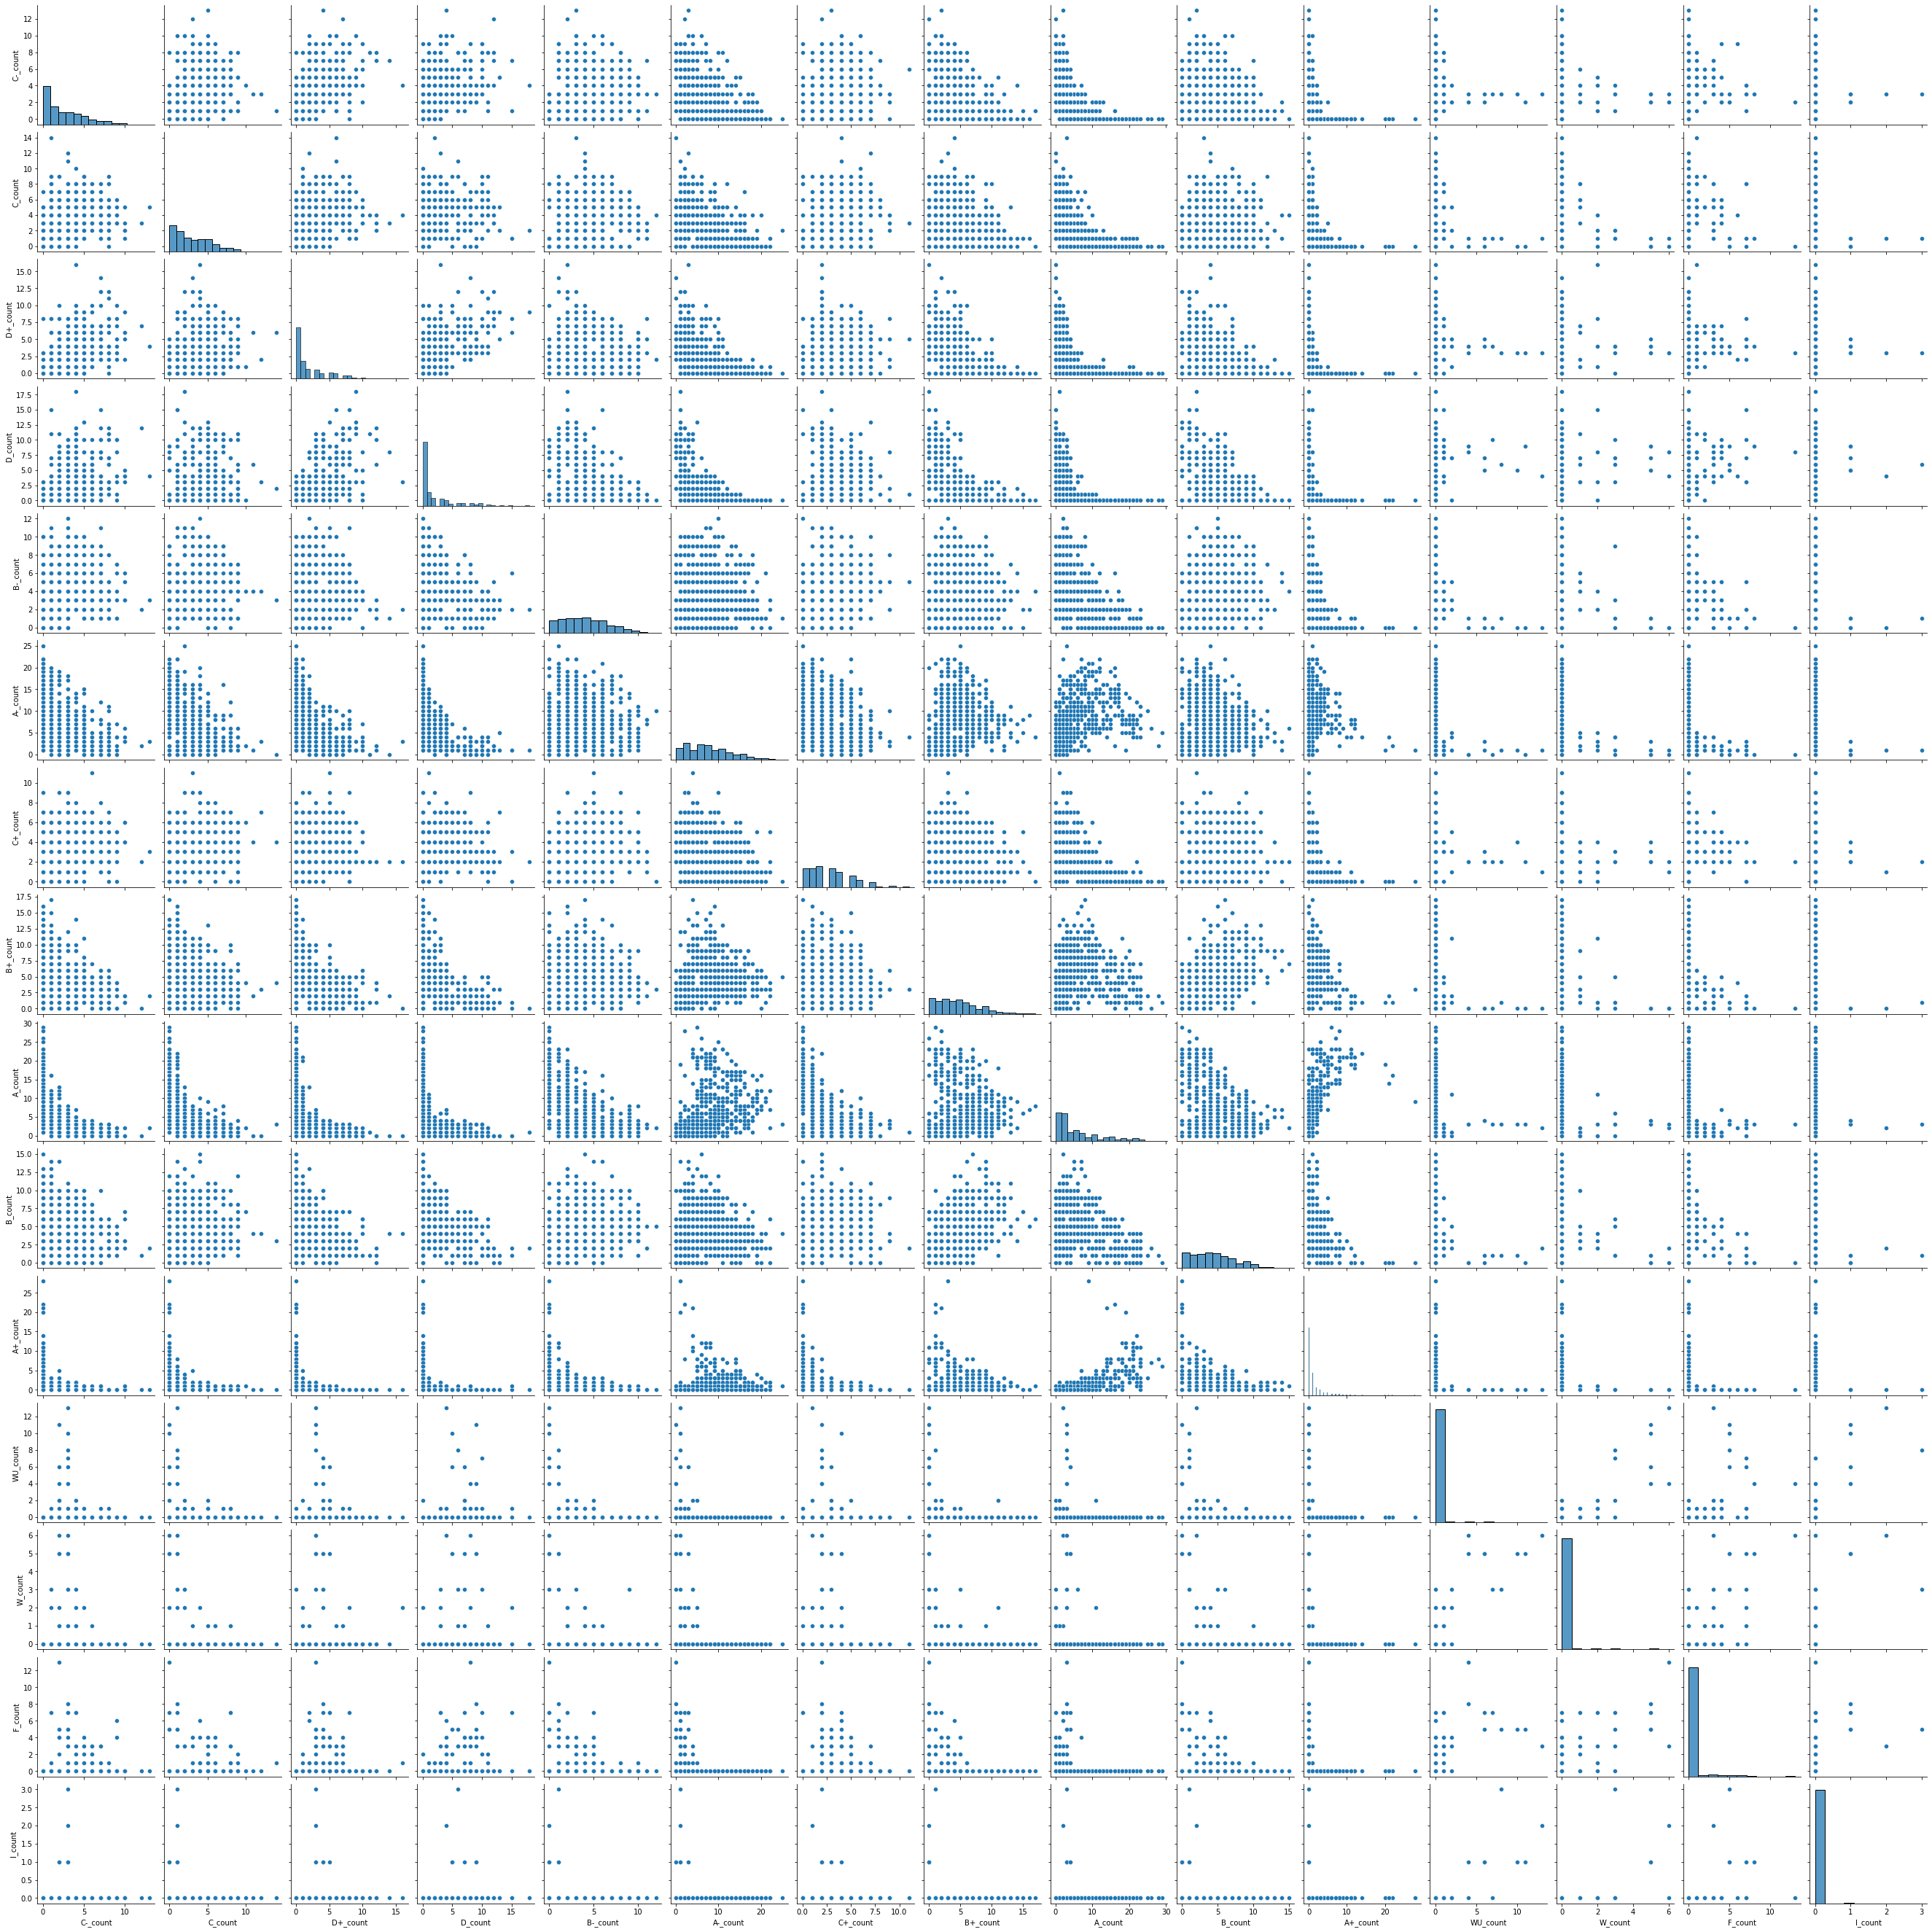

In [43]:
sns.pairplot(sub)

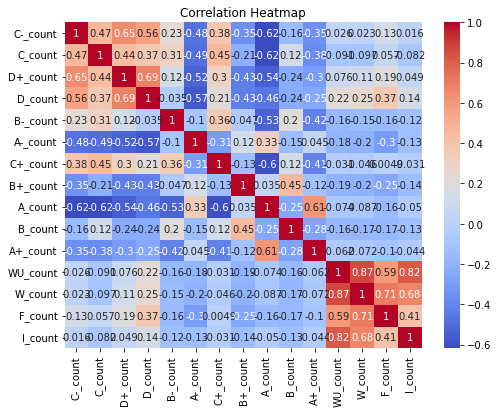

In [44]:
# Calculate correlation matrix
correlation_matrix = sub.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# The negative correlation you observe between the A_counts column and several other columns indicates an interesting relationship. 
# Check for multicollinearity using variance inflation factor (VIF) or other techniques.

In [45]:
sub["CGPA"] = df["CGPA"]

In [46]:
sub

,C-_count,C_count,D+_count,D_count,B-_count,A-_count,C+_count,B+_count,A_count,B_count,A+_count,WU_count,W_count,F_count,I_count,CGPA
0,13.0,5.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.205
1,4.0,7.0,7.0,11.0,4.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.008
2,0.0,1.0,0.0,0.0,3.0,9.0,1.0,4.0,18.0,4.0,1.0,0.0,0.0,0.0,0.0,3.608
3,4.0,2.0,9.0,11.0,4.0,1.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.906
4,1.0,1.0,0.0,0.0,5.0,19.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.0,0.0,0.0,0.0,0.0,8.0,0.0,4.0,18.0,4.0,7.0,0.0,0.0,0.0,0.0,3.798
567,0.0,1.0,0.0,0.0,0.0,6.0,1.0,3.0,21.0,3.0,6.0,0.0,0.0,0.0,0.0,3.772
568,0.0,1.0,0.0,0.0,2.0,5.0,1.0,10.0,12.0,9.0,1.0,0.0,0.0,0.0,0.0,3.470
569,5.0,5.0,3.0,8.0,7.0,0.0,3.0,2.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,2.193


,C-_count,C_count,D+_count,D_count,B-_count,A-_count,C+_count,B+_count,A_count,B_count,A+_count,WU_count,W_count,F_count,I_count,CGPA
44,3.0,1.0,3.0,4.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,13.0,6.0,3.0,2.0,1.493
60,3.0,1.0,3.0,6.0,1.0,1.0,2.0,1.0,3.0,1.0,0.0,8.0,3.0,5.0,3.0,2.418
86,1.0,1.0,8.0,15.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,7.0,0.0,1.261
91,3.0,1.0,4.0,10.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,7.0,3.0,7.0,0.0,1.380
101,7.0,1.0,6.0,15.0,6.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.768
136,12.0,3.0,7.0,12.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.714
137,3.0,0.0,3.0,5.0,0.0,1.0,4.0,0.0,3.0,1.0,0.0,10.0,5.0,5.0,1.0,2.653
142,2.0,1.0,4.0,5.0,1.0,3.0,3.0,0.0,4.0,1.0,0.0,6.0,5.0,5.0,1.0,2.943
143,2.0,0.0,3.0,9.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,11.0,5.0,5.0,1.0,1.000
281,2.0,0.0,3.0,8.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,4.0,6.0,13.0,0.0,1.092


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the columns you want to calculate VIF for (excluding non-grade columns if needed)
columns_for_vif = [col for col in sub.columns if '_' in col]

# Calculate VIF for the selected columns
vif_data = sub[columns_for_vif]
vif = pd.DataFrame()
vif["Feature"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(len(vif_data.columns))]

print(vif)

     Feature       VIF
0   C-_count  3.920039
1    C_count  3.881143
2   D+_count  4.048913
3    D_count  3.082859
4   B-_count  4.209136
5   A-_count  3.868544
6   C+_count  3.958441
7   B+_count  4.573129
8    A_count  5.079199
9    B_count  5.171129
10  A+_count  2.782347
11  WU_count  1.070602
12   W_count  1.045148
13   F_count  1.211770
14   I_count       NaN


/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


/var/folders/57/gh5p27812y92gkl08kl8whj40000gn/T/ipykernel_3018/3966264196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Failure_Grade_Count'] = sub['WU_count'] + sub['W_count'] + sub['F_count']+ sub['I_count']


 Feature Selection:

Removing columns with the least score is a form of feature selection, which can lead to a more compact and focused set of features. This can improve the model's efficiency and interpretability.

In [65]:
X = sub.drop(columns=['CGPA'])
y = sub['CGPA']


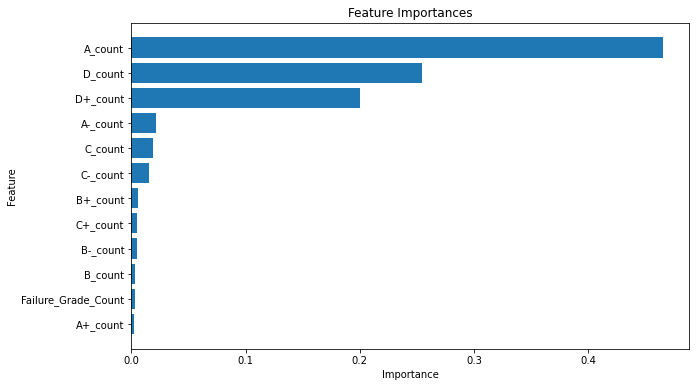

In [66]:
from sklearn.ensemble import RandomForestRegressor



# Initialize a Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to your data
model.fit(X, y)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the columns you want to calculate VIF for (excluding non-grade columns if needed)
columns_for_vif = [col for col in sub.columns if '_' in col]

# Calculate VIF for the selected columns
vif_data = sub[columns_for_vif]
vif = pd.DataFrame()
vif["Feature"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(len(vif_data.columns))]

print(vif)

                Feature       VIF
0              C-_count  3.897011
1               C_count  3.872524
2              D+_count  4.038668
3               D_count  3.062239
4              B-_count  4.142719
5              A-_count  3.866895
6              C+_count  3.944657
7              B+_count  4.565568
8               A_count  5.077752
9               B_count  5.168297
10             A+_count  2.782129
11  Failure_Grade_Count  1.171517



1. **Feature Importance:** As I mentioned earlier, the column with the highest feature importance was `A_counts`, which is not showing a particularly high VIF value. This suggests that the multicollinearity might not be directly causing the high feature importance.

2. **High VIF Values:** The columns `A_count` and `B_count` have VIF values slightly above 5, indicating moderate multicollinearity with other features. It might be worth investigating whether there is any strong correlation or interaction between these features and the other grade count features.

3. **Undefined VIF (NaN):** The column `I_count` has an undefined VIF (NaN). This might be due to the fact that the column has constant values (all missing values) or near-constant values, which can lead to division by zero when calculating VIF.

4. **Low VIF Values:** Several columns like `WU_count`, `F_count`, and `W_count` have low VIF values, indicating that they are not strongly correlated with other columns.

Given these observations, it's important to consider that while VIF values provide insights into multicollinearity, they might not fully explain the relationship between features. High feature importance could also be influenced by other factors such as the algorithm's sensitivity to certain features or their interactions. You might want to experiment further by removing certain features and evaluating the impact on both feature importance and model performance.

Lets combine columns : 'I_count' , `WU_count`, `F_count`, and `W_count`

Additionaly , I will be removing B_count from data modeling. 

In [ ]:
sub['Failure_Grade_Count'] = sub['WU_count'] + sub['W_count'] + sub['F_count']+ sub['I_count']
sub= sub.drop(columns=['WU_count','W_count','F_count','I_count'])

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
standardized_data = scaler.fit_transform(sub)


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = sub.drop(columns =['B_count','CGPA'])
y = sub["CGPA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(max_depth= 10,n_estimators=100,random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.006301631154026773


1.Store Model Instances: During cross-validation, you can store instances of the trained models for each fold. This will allow you to access and analyze the specific model that achieved the maximum R2 score.

2.Grid Search or Random Search: To find the best parameters, you can perform a grid search or random search over a range of hyperparameter values. You can use the GridSearchCV or RandomizedSearchCV classes from scikit-learn to automate this process.

In [103]:

from sklearn.model_selection import cross_val_score,KFold, GridSearchCV
from sklearn.metrics import make_scorer, r2_score

#X = X.drop(columns =['B_count'])

# Initialize a Random Forest Regressor model
model = RandomForestRegressor()

# Define the custom scoring function using r2_score
r2_scorer = make_scorer(r2_score)

# Define the cross-validation strategy (e.g., KFold with 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Define cv

# Perform cross-validation and get R2 scores
cv_scores = cross_val_score(model, X, y, cv=cv, scoring=r2_scorer)


# Find the fold with the highest R2 score
best_fold_index = cv_scores.argmax()
best_fold_model = model  # Initialize, this will be overwritten

# Store instances of trained models for each fold
fold_models = []

for fold_index, (train_idx, test_idx) in enumerate(cv.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Fit the model for this fold
    fold_model = model.fit(X_train, y_train)
    fold_models.append(fold_model)
    
    # If this is the best fold, store the model
    if fold_index == best_fold_index:
        best_fold_model = fold_model

# Print the best fold's model and its parameters
print("Best Fold Model:", best_fold_model)
print("Best Fold Model Parameters:", best_fold_model.get_params())

# Perform a grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 10, 20]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=r2_scorer)
grid_search.fit(X, y)

# Print the best parameters found through grid search
print("Best Parameters:", grid_search.best_params_)

# Print the R2 scores for each fold
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean CV R2 Score:", cv_scores.mean())
print("Max CV R2 Score:", cv_scores.max())
print("Standard Deviation:", cv_scores.std())

Best Fold Model: RandomForestRegressor()
Best Fold Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Cross-Validation R2 Scores: [0.98003492 0.98559409 0.9857418  0.97429671 0.96913943]
Mean CV R2 Score: 0.9789613900266471
Max CV R2 Score: 0.9857418000563652
Standard Deviation: 0.006470693033250833


An average R2 score of approximately 0.968 is very promising, as it indicates that this model explains about 97.8% of the variance in the target variable on average. 

The high individual fold R2 scores and low standard deviation further indicate the stability and generalization of model's performance.

In [137]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error, mean_squared_log_error


mae = mean_absolute_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Median Absolute Error: {median_ae}")
print(f"Explained Variance Score: {explained_var}")
print(f"Max Error: {max_err}")
print(f"Mean Squared Log Error: {msle}")



print(f"R-squared: {r2}")

Mean Absolute Error: 0.0570624380263923
Median Absolute Error: 0.035726865079365844
Explained Variance Score: 0.980618255283652
Max Error: 0.2942633333333329
Mean Squared Log Error: 0.0005263935431334216
R-squared: 0.9805133913281601


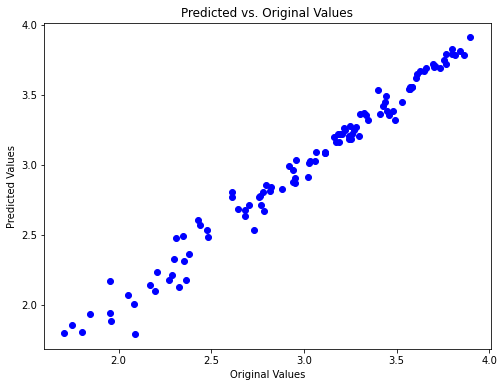

In [138]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Original Values')
plt.show()

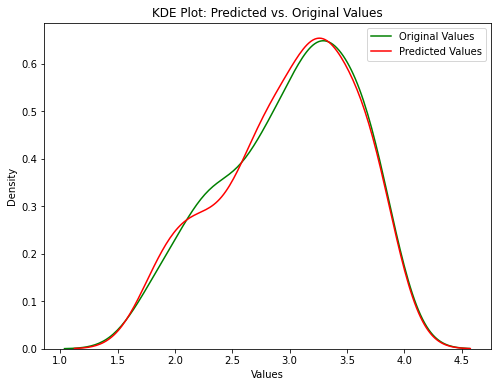

In [139]:
# Create a scatter plot with KDE plots
plt.figure(figsize=(8, 6))
#sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted')
sns.kdeplot(y_test, color='green', label='Original Values')
sns.kdeplot(y_pred, color='red', label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('KDE Plot: Predicted vs. Original Values')
plt.legend()
plt.show()